Evaluation of models trained on 5 core of Amazon Clothes dataset with hyperparameters:
loss: warp
learning_schedule: 'adadelta'
no_components: 100
Models were initialized with embeddings produced by word2vec. Pushing out the clusters of **probably** only Men and Women categories were activated.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse
import seaborn as sns
from tqdm.auto import tqdm

from utils import analyse_metrics, analyse_embeddings, reduce_item_embeddings

In [3]:
tqdm.pandas()
THREADS = 8

In [4]:
epochs = [1, 5, 25, 100, 250, 500, 1000]
models = [pd.read_pickle(f'/pio/scratch/1/i313924/data/lightfm_data/model_{epochs}_epochs_word2vec_regularized.pkl') for epochs in epochs]
train_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/5_core_interactions.npz')
test_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/5_core_test_interactions.npz')
dataset = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/5_core_dataset.pkl')

In [5]:
categories = pd.read_json(
    '/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)
abx_path = '/pio/scratch/1/recommender_systems/interim/ABX_tests/5_core.json'

In [12]:
item_ids = list(dataset.mapping()[2].keys())
women_ids = categories[(categories.category_1 == "Women") & (categories.asin.isin(item_ids))].asin.values
men_ids = categories[(categories.category_1 == "Men") & (categories.asin.isin(item_ids))].asin.values

PCA prepared
EPOCH: 1
EPOCH: 5
EPOCH: 25
EPOCH: 100
EPOCH: 250
EPOCH: 500
EPOCH: 1000


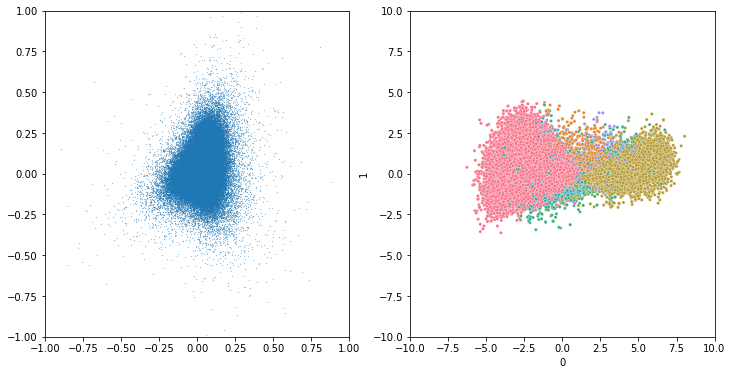

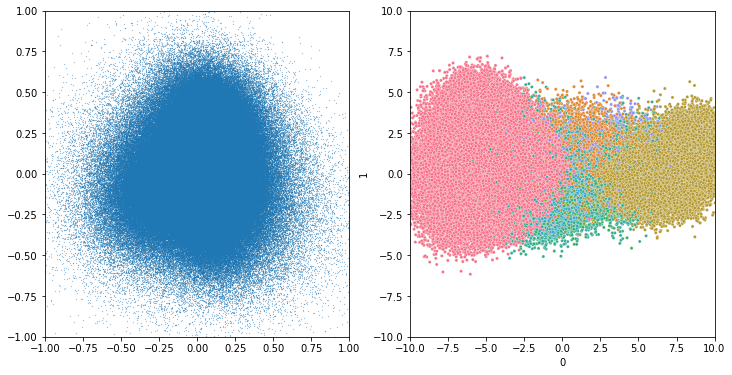

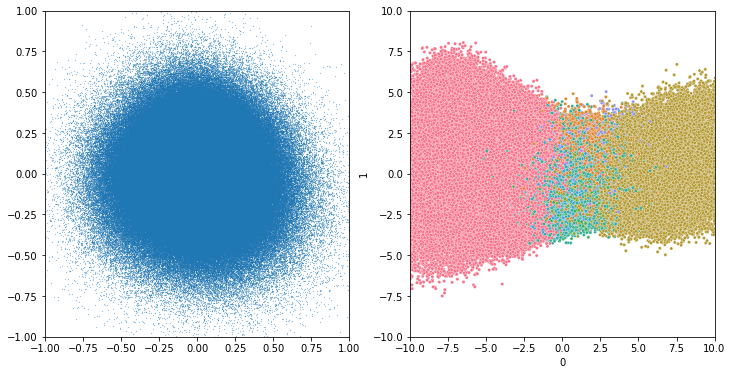

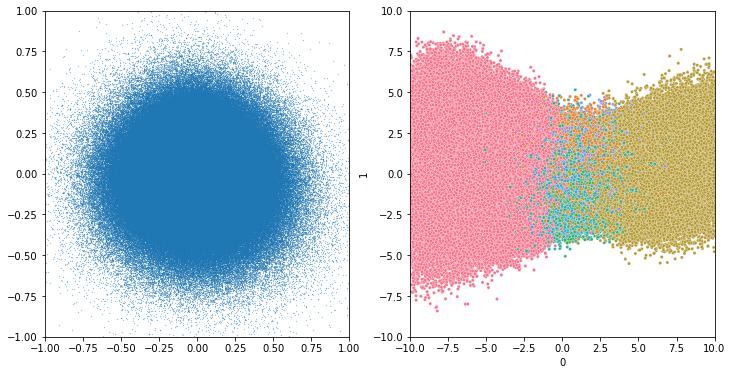

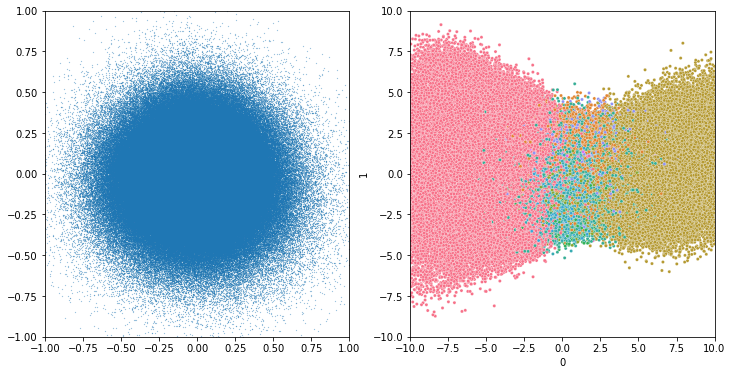

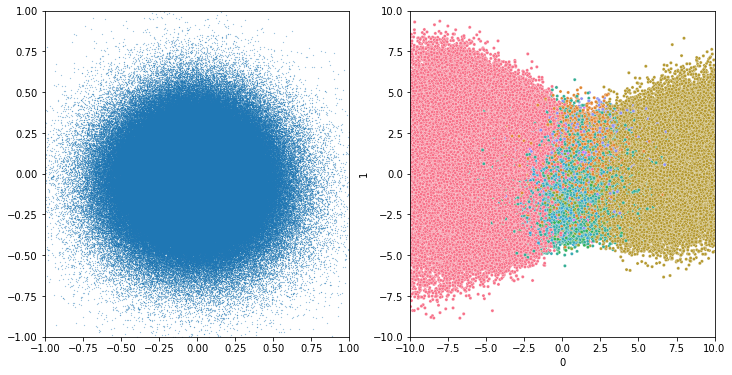

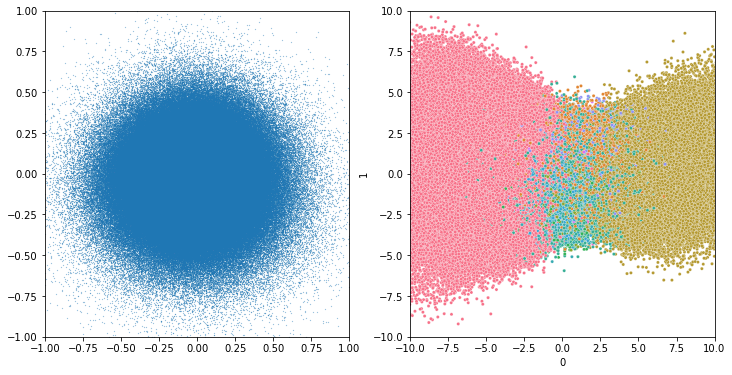

In [13]:
e, c, women_means, men_means, item_pca = analyse_embeddings(epochs, models, dataset, categories, abx_path, women_ids, men_ids)

<AxesSubplot:xlabel='0', ylabel='1'>

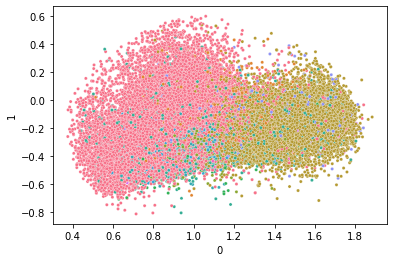

In [15]:
word2vec_embeddings = pd.read_parquet('/pio/scratch/1/recommender_systems/processed/word2vec/amazon-clothes/5-core/item_item_embeddings.parquet')
transformed = pd.DataFrame(item_pca.transform(word2vec_embeddings))
transformed.index = word2vec_embeddings.index
transformed = transformed.join(categories.set_index('asin'))
transformed.columns = ['0', '1', 'category_1', 'category_2']
sns.scatterplot(x='0', y='1', data=transformed, hue='category_1', s=10, legend=False)

<AxesSubplot:xlabel='0', ylabel='1'>

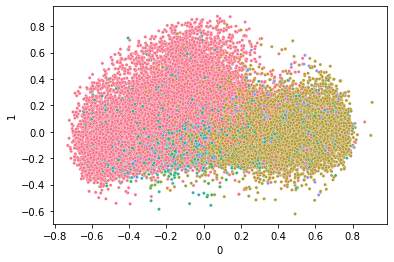

In [16]:
t2 = pd.DataFrame(PCA(n_components=2).fit_transform(word2vec_embeddings))
t2.index = word2vec_embeddings.index
t2 = t2.join(categories.set_index('asin'))
t2.columns = ['0', '1', 'category_1', 'category_2']
sns.scatterplot(x='0', y='1', data=t2, hue='category_1', s=10, legend=False)

Eucl dist


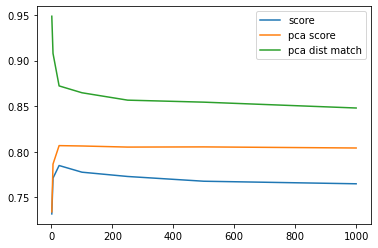

Cos dist


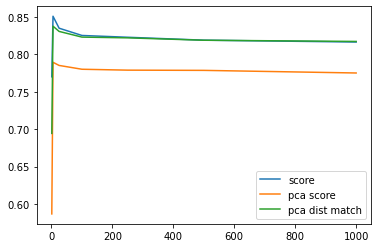

In [17]:
print("Eucl dist")
plt.plot(np.tile(epochs, (3, 1)).T, e)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()
print("Cos dist")
plt.plot(np.tile(epochs, (3, 1)).T, c)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()

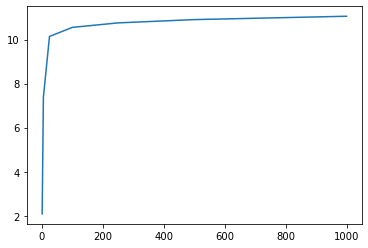

In [18]:
plt.plot(epochs, np.sqrt(((np.array(men_means) - np.array(women_means))**2).sum(axis=1)))

In [19]:
reduced_men_means = item_pca.transform(men_means)
reduced_women_means = item_pca.transform(women_means)

In [20]:
reduced_men_means

array([[ 2.28927984e+00, -1.80919190e-01],
       [ 5.02441046e+00, -4.45173957e-03],
       [ 6.47115399e+00,  2.50484283e-01],
       [ 6.67849352e+00,  2.97416520e-01],
       [ 6.77610739e+00,  3.12685909e-01],
       [ 6.84670833e+00,  3.20613716e-01],
       [ 6.91904111e+00,  3.26628816e-01]])

In [21]:
reduced_women_means

array([[ 0.21138106, -0.16982964],
       [-2.34096535,  0.15977861],
       [-3.6498676 ,  0.29856207],
       [-3.85400328,  0.31405087],
       [-3.95902227,  0.31902309],
       [-4.03630822,  0.32127247],
       [-4.11531749,  0.3214485 ]])

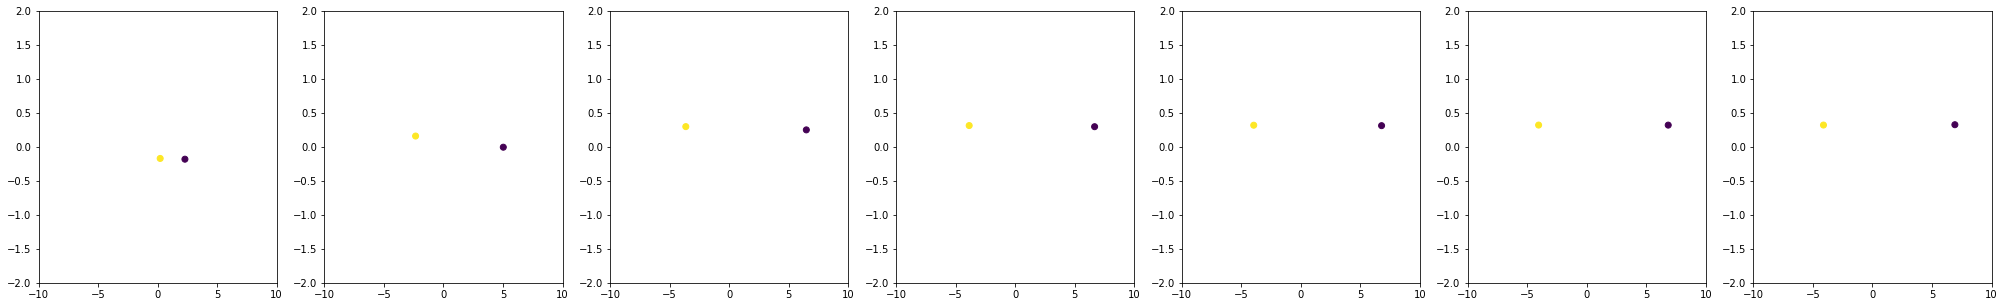

In [22]:
figure, axis = plt.subplots(1, len(epochs), figsize=(len(epochs)*5,5))
for i in range(len(epochs)):
    axis[i].scatter([reduced_men_means[i][0], reduced_women_means[i][0]], [reduced_men_means[i][1], reduced_women_means[i][1]], c=[1, 2])
    axis[i].set_xlim([-10, 10])
    axis[i].set_ylim([-2, 2])

In [23]:
tqdm.pandas()
test_hit_rate_scores, test_recall_scores, test_precision_scores = analyse_metrics(models, train_interactions, test_interactions, dataset)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [24]:
test_recall_scores

[0.16504, 0.18122, 0.23108, 0.24986, 0.2564, 0.25838, 0.2599]

In [25]:
test_precision_scores

[0.016503999999999998,
 0.018121999999999996,
 0.023108,
 0.024986,
 0.025640000000000003,
 0.025838,
 0.025990000000000003]

In [26]:
test_hit_rate_scores

[0.2756, 0.3496, 0.4381, 0.4704, 0.486, 0.4925, 0.4973]